<a href="https://colab.research.google.com/github/Jensen-Phetchampa/LR_example/blob/main/LR_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

**Define the input and output to the model X and Y**

In [5]:
X = data.drop('Scores', axis=1)
Y = data['Scores']

**Draw the relationship between Hours and scores**

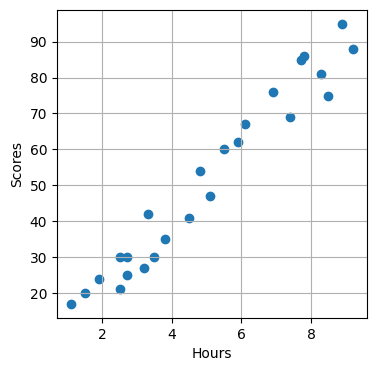

In [6]:
plt.figure(figsize=(4,4))

plt.scatter(X,Y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

**Import Required libraries for linear regression from sklearn**

In [7]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


**Split the data to train and test**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

**Initialize your LR model and set hyperparameters**

In [9]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_train, Y_train)

LinearRegression()

**Calculate the actual and estimated responses at both training and testing cases**

In [10]:
alpha = LR_model.intercept_
beta = LR_model.coef_

print("alpha", alpha)
print("beta", beta)

print(f"y = {alpha} + {beta} X")

alpha -0.33798242262133016
beta [10.28085594]
y = -0.33798242262133016 + [10.28085594] X


**Calculate the actual and estimated responses at both training and testing cases**

In [11]:
Y_pred_train = LR_model.predict(X_train)
Y_pred_test = LR_model.predict(X_test)

**Drawing the actual and estimated in both training and testing cases**

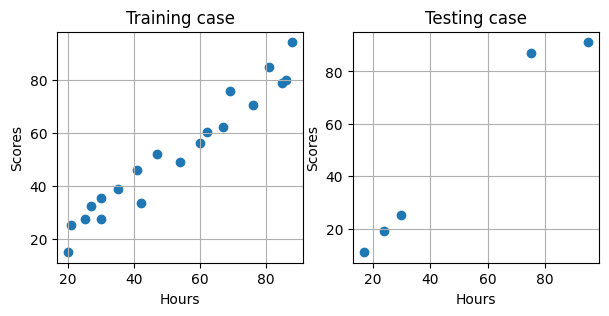

In [12]:
plt.figure(figsize=(7,3))

# subplot 1
plt.subplot(1,2,1)
plt.scatter(Y_train, Y_pred_train)
plt.title('Training case')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)

# subplot 2
plt.subplot(1,2,2)
plt.scatter(Y_test, Y_pred_test)
plt.title('Testing case')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)

plt.show()

**Calculate the model performance: MSE and MAE**

In [13]:
mse_train = mean_squared_error(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)

mse_test = mean_squared_error(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)

In [17]:
# creat a dataframe of the results

performance_data = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'MSE', 'MAE'],
    'DataType': ['train', 'train', 'test', 'test'],
    'Values': [mse_train, mae_train, mse_test, mae_test]
})

performance_data.T

,0,1,2,3
Metric,MSE,MAE,MSE,MAE
DataType,train,train,test,test
Values,26.118428,4.871914,48.168143,6.271379
